In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix,roc_auc_score,roc_curve
from sklearn.metrics import classification_report
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('crop_recommendation.csv')

In [3]:
df.shape

(2200, 8)

In [4]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [5]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [6]:
df.corr()

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


In [7]:
df.isna().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [8]:
df['N'].replace(to_replace = 0, value = df['N'].mean(), inplace=True)

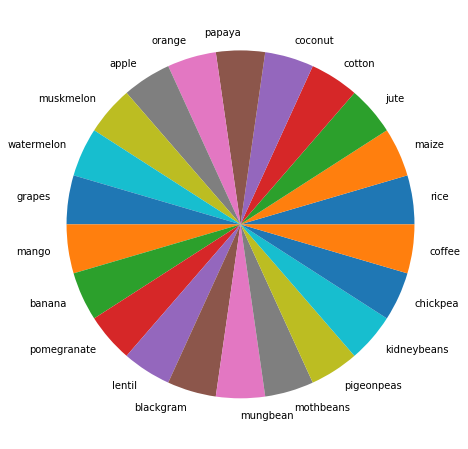

In [9]:
import matplotlib.pyplot as plt
output_counts = df["label"].value_counts()
plt.figure(figsize=(8,8))
plt.pie(output_counts.values, labels=output_counts.index)
plt.show()

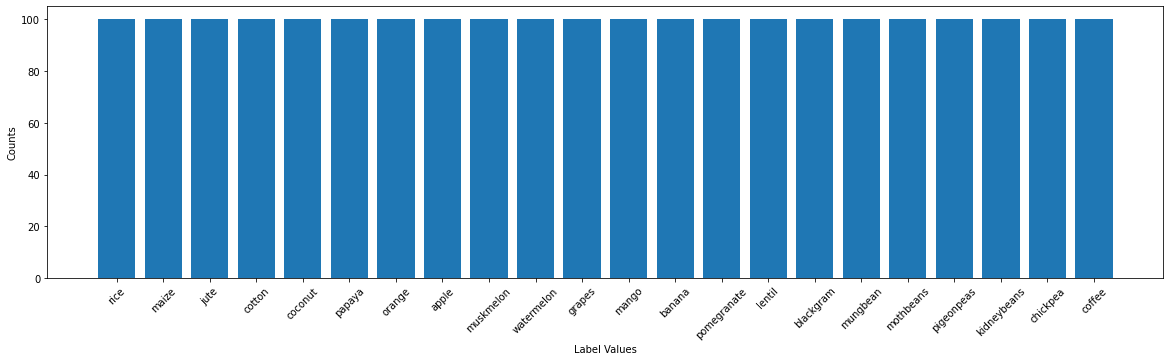

In [10]:
import matplotlib.pyplot as plt

# assuming your dataset is stored in a variable called "data"
# and the output column is called "output"
output_counts = df["label"].value_counts()

plt.figure(figsize=(20,5))
plt.bar(output_counts.index, output_counts.values)
plt.xlabel("Label Values")
plt.ylabel("Counts")
plt.xticks(rotation=45)
plt.show()


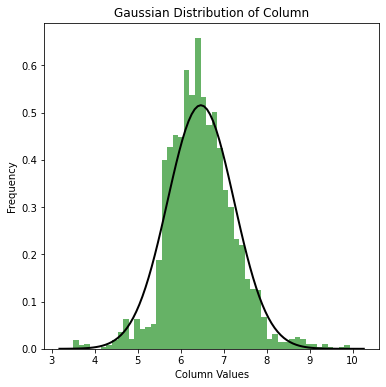

In [11]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np


column_data = df["ph"]
mu, std = norm.fit(column_data)
plt.figure(figsize=(6,6))
plt.hist(column_data, bins=50, density=True, alpha=0.6, color='g')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.xlabel("Column Values")
plt.ylabel("Frequency")
plt.title("Gaussian Distribution of Column")
plt.show()


In [12]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90.0,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85.0,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60.0,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74.0,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78.0,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [13]:
X= df.drop(columns='label')

In [14]:
X

,N,P,K,temperature,humidity,ph,rainfall
0,90.0,42,43,20.879744,82.002744,6.502985,202.935536
1,85.0,58,41,21.770462,80.319644,7.038096,226.655537
2,60.0,55,44,23.004459,82.320763,7.840207,263.964248
3,74.0,35,40,26.491096,80.158363,6.980401,242.864034
4,78.0,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107.0,34,32,26.774637,66.413269,6.780064,177.774507
2196,99.0,15,27,27.417112,56.636362,6.086922,127.924610
2197,118.0,33,30,24.131797,67.225123,6.362608,173.322839
2198,117.0,32,34,26.272418,52.127394,6.758793,127.175293


In [15]:
y=df['label']

In [16]:
print(y.describe())

count     2200
unique      22
top       rice
freq       100
Name: label, dtype: object


In [17]:
x_train, x_test, y_train, y_test=train_test_split(X,y,test_size=.20, random_state=300)

In [18]:
x_train

,N,P,K,temperature,humidity,ph,rainfall
256,37.0,66,85,20.931753,18.912954,6.456148,78.069108
160,79.0,45,20,23.805462,59.245380,5.715209,89.962201
361,24.0,67,22,20.120043,22.898456,5.618844,104.625215
854,6.0,68,18,24.388717,62.504531,6.711341,47.260525
492,20.0,67,19,19.244628,50.544953,5.671419,180.646528
...,...,...,...,...,...,...,...
2139,113.0,21,33,26.022414,55.832890,7.277423,176.902092
1749,39.0,64,52,28.918425,94.636768,6.678696,63.687946
1033,102.0,71,48,28.654563,79.286937,5.695268,102.463378
1738,44.0,57,53,42.304958,90.514318,6.931721,74.876786


In [19]:
y_train

256        chickpea
160           maize
361     kidneybeans
854          lentil
492      pigeonpeas
           ...     
2139         coffee
1749         papaya
1033         banana
1738         papaya
1233         grapes
Name: label, Length: 1760, dtype: object

In [20]:
x_test

,N,P,K,temperature,humidity,ph,rainfall
841,16.0,65,19,27.612050,69.297862,7.043160,42.723744
1791,56.0,65,45,38.201682,93.973800,6.751299,218.090881
612,24.0,42,23,28.224713,82.359162,6.428054,44.012066
1268,29.0,142,203,29.672291,83.714990,5.891196,66.484904
1029,89.0,83,47,28.095776,77.795868,5.631272,109.540861
...,...,...,...,...,...,...,...
253,29.0,77,75,17.503611,15.480832,7.778592,72.944667
2146,98.0,29,30,25.640044,61.032735,6.217974,199.473564
186,65.0,60,22,25.367684,72.520546,6.606984,107.912411
1767,45.0,58,49,30.107734,90.345464,6.827813,75.245220


In [21]:
y_test

841          lentil
1791         papaya
612        mungbean
1268         grapes
1029         banana
           ...     
253        chickpea
2146         coffee
186           maize
1767         papaya
368     kidneybeans
Name: label, Length: 440, dtype: object

# LOGISTIC REGRESSION

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
# Initialzing empty lists to append all model's name and corresponding name
acc = []
model = []

In [24]:
LogReg = LogisticRegression()
LogReg.fit(x_train,y_train)

predicted = LogReg.predict(x_test)
x = metrics.accuracy_score(y_test,predicted)
acc.append(x) 
model.append('Logistic Regression')
print("Logistic Regression Accuracy is",x * 100)
print(classification_report(y_test,predicted))

Logistic Regression Accuracy is 95.9090909090909
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        24
      banana       1.00      1.00      1.00        22
   blackgram       0.90      0.93      0.91        28
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        25
      coffee       1.00      1.00      1.00        14
      cotton       1.00      0.93      0.97        15
      grapes       1.00      1.00      1.00        18
        jute       0.86      0.95      0.90        19
 kidneybeans       0.95      1.00      0.98        21
      lentil       1.00      0.96      0.98        23
       maize       0.94      1.00      0.97        16
       mango       0.95      1.00      0.97        19
   mothbeans       0.86      0.86      0.86        22
    mungbean       0.94      1.00      0.97        17
   muskmelon       1.00      1.00      1.00        14
      orange       1.00      1.0

In [25]:
from sklearn.model_selection import cross_val_score

In [26]:
score = cross_val_score(LogReg,X,y,cv = 5)

In [27]:
score

array([0.95      , 0.95909091, 0.96136364, 0.97045455, 0.94545455])

# RANDOM FOREST

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
RF = RandomForestClassifier(n_estimators=29, criterion = 'entropy',random_state=0)
RF.fit(x_train,y_train)
predicted = RF.predict(x_test)
x = metrics.accuracy_score(y_test,predicted)
acc.append(x)
model.append('Random Forest')
print("Random Forest Accuracy is ",x * 100)
print(classification_report(y_test,predicted))

Random Forest Accuracy is  99.0909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        24
      banana       1.00      1.00      1.00        22
   blackgram       1.00      1.00      1.00        28
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        25
      coffee       1.00      1.00      1.00        14
      cotton       1.00      1.00      1.00        15
      grapes       1.00      1.00      1.00        18
        jute       0.90      1.00      0.95        19
 kidneybeans       1.00      1.00      1.00        21
      lentil       0.92      1.00      0.96        23
       maize       1.00      1.00      1.00        16
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.91      0.95        22
    mungbean       1.00      1.00      1.00        17
   muskmelon       1.00      1.00      1.00        14
      orange       1.00      1.00    

In [30]:
score = cross_val_score(RF,X,y,cv = 5)

In [31]:
score

array([0.99545455, 0.99318182, 0.99772727, 0.99318182, 0.98409091])

# DecisionTree

In [32]:
dt_model  = DecisionTreeClassifier()

In [33]:
import sklearn
import matplotlib.pyplot as plt
from sklearn import tree
%matplotlib inline

In [34]:
dt_model.fit(x_train.values,y_train.values)
tree_predicted = dt_model.predict(x_test)

# Calculate accuracy
tree_accuracy = metrics.accuracy_score(y_test, tree_predicted)
print("Decision Tree Accuracy is", tree_accuracy * 100)

Decision Tree Accuracy is 98.63636363636363


In [ ]:
plt.figure(figsize=(20,20))
tree.plot_tree(dt_model, filled=True,class_names=[str(i) for i in set(y)],feature_names =X.columns)
plt.savefig('dt_model')

In [ ]:
dt_model.predict(x_test)

In [ ]:
dt_model.score(x_test, y_test)

In [ ]:
import pickle

In [ ]:
# save to file
crop_rec_filename = 'crop_rec.pickle'
with open(crop_rec_filename,'wb') as file:
    pickle.dump(dt_model,file)

# load from file
#with open(pkl_rfc_diabetes_filename,'rb') as file:
#   pickle_model = pickle.load(file)

In [ ]:
dt_model.score(x_test,y_test)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [ ]:
loaded_model = pickle.load(open(crop_rec_filename, 'rb'))
result = loaded_model.score(x_test, y_test)
print(result)

In [ ]:
dt_model.predict([[90,42, 43, 23.603016, 60.3, 6.7, 140.91]])